<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   GrLivArea    1460 non-null   int64
 1   TotalBsmtSF  1460 non-null   int64
 2   YearBuilt    1460 non-null   int64
 3   OverallQual  1460 non-null   int64
 4   GarageCars   1460 non-null   int64
 5   1stFlrSF     1460 non-null   int64
 6   FullBath     1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB


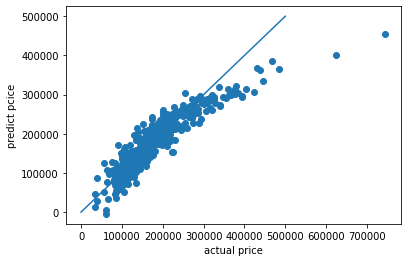

   GrLivArea  TotalBsmtSF  YearBuilt  OverallQual  GarageCars  1stFlrSF  \
0       1710          856       2003            7           2       856   

   FullBath  
0         2  
[212324.41293976]


In [29]:
# import numpy as np 
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import sklearn as sk
# import linecache as li


# df_data = pd.read_csv("Price.csv")
# data = df_data[["GrLivArea","TotalBsmtSF","EnclosedPorch","HouseStyle","YearBuilt","RoofStyle","OverallQual","GarageCars","Id","1stFlrSF","FullBath","LowQualFinSF","SalePrice"]]
# data.corr(method="pearson")

# #plt.figure(figsize= (13,13)) # 圖形大小
# #sns.heatmap(data.corr(),annot = True) # 塗顏色
# #plt.show() # 顯示圖形

# #我們組挑了GrLiv TotalBsmt Enclose HouseStyle YearBulit RoofStyle OverallQual GarageCars ID 1stFlr FullBath LowQualFinSF 來分析
# #檢查所選項目有無缺失職需要補
# # nullse=df_data.isnull().sum()
# # print(nullse[nullse>0])
# # data = df_data[["Id","GrLivArea","SalePrice"]]
# # data.info()

# data = pd.get_dummies(data=data, columns=['HouseStyle'])
# data = pd.get_dummies(data=data, columns=['RoofStyle'])

# from sklearn.linear_model import LinearRegression # 引入LinearRegression
# from sklearn.model_selection import train_test_split # 引入train_test_split
# import matplotlib.pyplot as plt # 引入pyplot
# y = data["SalePrice"] # 房價數據
# data2 = data.drop(["SalePrice"],axis=1)
# x = data2
# x.info()
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比
# lnregr = LinearRegression()
# lnregr.fit(x_train, y_train) # 將資料拿去訓練

# y_predict = lnregr.predict(x_test) # 北test的資料用訓練出來的模型去預測

# plt.xlabel("actual price") # x軸的標題
# plt.ylabel("predict pcice") # y軸的標題
# plt.plot([0,500000], [0,500000]) # 劃一條基準線
# plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
# plt.show() # 察看結果
# lnregr.score(x_train, y_train) 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import linecache as li


df_data = pd.read_csv("Price.csv")
#相關係數
corr = df_data.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

data = df_data[["GrLivArea","TotalBsmtSF","EnclosedPorch","HouseStyle","YearBuilt","RoofStyle","OverallQual","GarageCars","Id","1stFlrSF","FullBath","LowQualFinSF","SalePrice"]]
data2 = data.drop(["Id","HouseStyle","RoofStyle","LowQualFinSF","EnclosedPorch"],axis=1)
#print('data:\n',data)
#print('data2:\n',data2)
data2.corr(method="pearson")
###
# data2.head()
# plt.figure(figsize= (13,13)) # 圖形大小
# sns.heatmap(data.corr(),annot = True) # 塗顏色
# plt.show() # 顯示圖形

# # 我們組挑了GrLiv TotalBsmt Enclose HouseStyle YearBulit RoofStyle OverallQual GarageCars ID 1stFlr FullBath LowQualFinSF 來分析
# # 檢查所選項目有無缺失職需要補
# nullse=df_data.isnull().sum()
# print(nullse[nullse>0])
# data = df_data[["Id","GrLivArea","SalePrice"]]
# data.info()

# data2 = pd.get_dummies(data=data2, columns=['RoofStyle'])
###
from sklearn.linear_model import LinearRegression # 引入LinearRegression
from sklearn.model_selection import train_test_split # 引入train_test_split
import matplotlib.pyplot as plt # 引入pyplot
y = data2["SalePrice"] # 房價數據
data3 = data2.drop(["SalePrice"],axis=1)
x = data3
x.info()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比
lnregr = LinearRegression()
lnregr.fit(x_train, y_train) # 將資料拿去訓練

y_predict = lnregr.predict(x_test) # 北test的資料用訓練出來的模型去預測

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.plot([0,500000], [0,500000]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
plt.show() # 察看結果
lnregr.score(x_train, y_train) 

import joblib

#保存Model(注:save文件夹要预先建立，否则会报错)
joblib.dump(lnregr, 'clf.pkl')

#读取Model
clf3 = joblib.load('clf.pkl')
x_test.head()
#测试读取后的Model
data3[0:1]
print(data3[0:1])
print(clf3.predict(data3[0:1]))